In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from causallearn.utils.GraphUtils import GraphUtils
import matplotlib.image as mpimg
import io
import os
plt.style.use('seaborn')

In [2]:
# Define a list of potential marker styles
markers = ['o', 's', '^', 'v', '<', '>', 'p', '*', 'h', 'H', 'D', 'd', '|', '_']

## Specify the experimental data 

In [47]:
path = "../data/pcm/fixed_rate/1510B-4096"

### Read the PCM statistics

In [48]:
core = pd.read_csv(path+"/"+ "bridge-pcm.csv",  header=[0,1])
print(core.describe())

         Socket 0                                                              \
             EXEC         IPC        FREQ       AFREQ      L3MISS      L2MISS   
count  583.000000  583.000000  583.000000  583.000000  583.000000  583.000000   
mean     0.572316    2.946981    0.193396    1.178285    0.089468   10.817204   
std      0.010151    0.165658    0.010244    0.006160    0.126280    0.604951   
min      0.520000    2.050000    0.190000    1.140000    0.030000   10.120000   
25%      0.570000    2.980000    0.190000    1.180000    0.040000   10.520000   
50%      0.570000    3.000000    0.190000    1.180000    0.050000   10.660000   
75%      0.580000    3.020000    0.190000    1.180000    0.060000   10.780000   
max      0.580000    3.040000    0.260000    1.190000    0.780000   13.610000   

                                                  ... Core3 (Socket 0)  \
            L3HIT       L2HIT  L3MPI       L2MPI  ...           C7res%   
count  583.000000  583.000000  583.0  583

In [49]:
core.columns

MultiIndex([(              'System',                'Date'),
            (              'System',                'Time'),
            (            'Socket 0',                'EXEC'),
            (            'Socket 0',                 'IPC'),
            (            'Socket 0',                'FREQ'),
            (            'Socket 0',               'AFREQ'),
            (            'Socket 0',              'L3MISS'),
            (            'Socket 0',              'L2MISS'),
            (            'Socket 0',               'L3HIT'),
            (            'Socket 0',               'L2HIT'),
            (            'Socket 0',               'L3MPI'),
            (            'Socket 0',               'L2MPI'),
            (            'Socket 0',               'L3OCC'),
            (            'Socket 0',                'READ'),
            (            'Socket 0',               'WRITE'),
            (            'Socket 0',               'LOCAL'),
            (           

<AxesSubplot:>

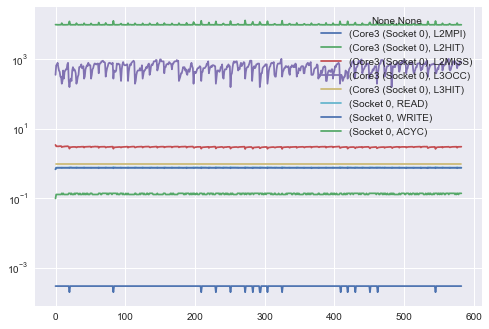

In [50]:
core[[('Core3 (Socket 0)', 'L2MPI'), ('Core3 (Socket 0)', 'L2HIT'), 
    ('Core3 (Socket 0)', 'L2MISS'), ('Core3 (Socket 0)', 'L3OCC'), ('Core3 (Socket 0)', 'L3HIT'), 
    ('Socket 0', 'READ'), ('Socket 0', 'WRITE'), ('Socket 0', 'ACYC')]].plot(logy=True)

In [51]:
columns_filtered = [col for col in core.columns if "Core3" in col[0]] + [('Socket 0', 'READ'), ('Socket 0', 'WRITE')]
core_filtered = core[columns_filtered]
core_filtered.columns = [col[1] for col in columns_filtered]

# Drop TEMP, INST, ACYC, TIME(ticks)
core_filtered.drop(columns=["TEMP", "INST", "ACYC", "TIME(ticks)"], inplace=True)
core_filtered

C:\Users\tiazhang\AppData\Local\Temp\ipykernel_6944\2366661695.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  core_filtered.drop(columns=["TEMP", "INST", "ACYC", "TIME(ticks)"], inplace=True)


,EXEC,IPC,FREQ,AFREQ,L3MISS,L2MISS,L3HIT,L2HIT,L3MPI,L2MPI,...,C1res%,C3res%,C6res%,C7res%,PhysIPC,PhysIPC%,INSTnom,INSTnom%,READ,WRITE
0,4.43,3.75,1.18,1.19,0.00,3.47,1.0,0.10,0.0,0.0003,...,0.32,0.0,0.0,0.0,7.50,187.44,8.86,221.56,0.69,0.69
1,4.46,3.77,1.19,1.19,0.01,3.17,1.0,0.13,0.0,0.0003,...,0.23,0.0,0.0,0.0,7.53,188.28,8.93,223.13,0.77,0.76
2,4.46,3.76,1.18,1.19,0.00,3.15,1.0,0.13,0.0,0.0003,...,0.25,0.0,0.0,0.0,7.53,188.19,8.91,222.84,0.77,0.76
3,4.47,3.76,1.19,1.19,0.01,3.17,1.0,0.13,0.0,0.0003,...,0.19,0.0,0.0,0.0,7.53,188.22,8.94,223.44,0.77,0.76
4,4.46,3.77,1.19,1.19,0.00,3.14,1.0,0.13,0.0,0.0003,...,0.25,0.0,0.0,0.0,7.53,188.34,8.93,223.19,0.77,0.76
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
578,4.47,3.77,1.19,1.19,0.00,3.06,1.0,0.13,0.0,0.0003,...,0.25,0.0,0.0,0.0,7.54,188.59,8.94,223.57,0.77,0.76
579,4.48,3.77,1.19,1.19,0.00,3.05,1.0,0.14,0.0,0.0003,...,0.20,0.0,0.0,0.0,7.55,188.67,8.96,223.90,0.77,0.76
580,4.46,3.76,1.19,1.19,0.00,3.06,1.0,0.14,0.0,0.0003,...,0.24,0.0,0.0,0.0,7.52,188.05,8.92,222.96,0.77,0.76
581,4.47,3.77,1.19,1.19,0.00,3.07,1.0,0.14,0.0,0.0003,...,0.23,0.0,0.0,0.0,7.53,188.25,8.93,223.32,0.77,0.76


### Read the PCM-Memory statistics

In [52]:
mem = pd.read_csv(path+"/"+ "pcm-memory.csv",  header=[0,1])

print("Data dimension: ", mem.shape)
print("Data columns: ", mem.columns)

Data dimension:  (583, 29)
Data columns:  MultiIndex([('Unnamed: 0_level_0',             'Date'),
            ('Unnamed: 1_level_0',             'Time'),
            (              'SKT0',          'Ch0Read'),
            (              'SKT0',         'Ch0Write'),
            (              'SKT0',          'Ch1Read'),
            (              'SKT0',         'Ch1Write'),
            (              'SKT0',          'Ch2Read'),
            (              'SKT0',         'Ch2Write'),
            (              'SKT0',          'Ch3Read'),
            (              'SKT0',         'Ch3Write'),
            (              'SKT0',  'Mem Read (MB/s)'),
            (              'SKT0', 'Mem Write (MB/s)'),
            (              'SKT0',   'P. Write (T/s)'),
            (              'SKT0',    'Memory (MB/s)'),
            (              'SKT1',          'Ch0Read'),
            (              'SKT1',         'Ch0Write'),
            (              'SKT1',          'Ch1Read'),
      

#### Visualizing the memory statistics of Socket 0

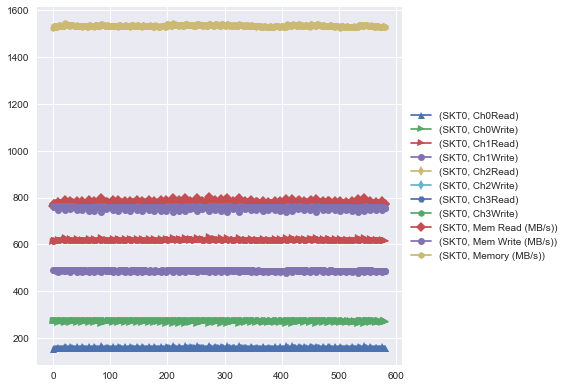

In [53]:
# Plot each column with a random marker
ax = None
for col in mem.columns:
    if "SKT0" in col and not 'P. Write (T/s)' in col:
        ax = mem[col].plot(marker=np.random.choice(markers), ax=ax)
    
#plt.yscale("log")
# Adjust legend and layout
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.show()
#plt.savefig("1.png")

In [10]:
#filename = path.split("/")[-1]
#plt.savefig(filename + "-mem"+ ".pdf")

In [11]:
columns_filtered = [col for col in mem.columns if "SKT0" in col[0]] 
mem_filtered = mem[columns_filtered]
mem_filtered.columns = [col[1] for col in columns_filtered]
mem_filtered.columns

Index(['Ch0Read', 'Ch0Write', 'Ch1Read', 'Ch1Write', 'Ch2Read', 'Ch2Write',
       'Ch3Read', 'Ch3Write', 'Mem Read (MB/s)', 'Mem Write (MB/s)',
       'P. Write (T/s)', 'Memory (MB/s)'],
      dtype='object')

### Read the PCM-pcie statistics

In [12]:
pcie = pd.read_csv(path+"/"+ "pcm-pcie.csv", )
print("Data description: ", pcie.describe())

Data description:           Skt  PCIRdCur   RFO   CRd   DRd  ItoM   PRd   WiL
count   1739      1739  1739  1739  1739  1739  1739  1739
unique     3      1133   726  1152  1160   581   152   801
top        0  PCIRdCur   RFO   CRd   DRd  ItoM   PRd   WiL
freq     580       579   579   579   579   579   579   579


In [13]:
pcie.columns

Index(['Skt', 'PCIRdCur', 'RFO', 'CRd', 'DRd', 'ItoM', 'PRd', 'WiL'], dtype='object')

In [14]:
pcie.head(10)

,Skt,PCIRdCur,RFO,CRd,DRd,ItoM,PRd,WiL
0,0,20624870,4375196,1168818,21006594,11464502,0,263452
1,1,19688172,179578,4336430,15095346,0,37184,217602
2,Skt,PCIRdCur,RFO,CRd,DRd,ItoM,PRd,WiL
3,0,10798830,1818516,2988230,21805882,12011398,1288,278334
4,1,20798316,179186,5739314,14929138,0,36792,217980
5,Skt,PCIRdCur,RFO,CRd,DRd,ItoM,PRd,WiL
6,0,11346566,1902642,2013228,22118068,12249594,140,286594
7,1,20817482,179396,6043940,14919688,0,36932,217700
8,Skt,PCIRdCur,RFO,CRd,DRd,ItoM,PRd,WiL
9,0,11834956,1944810,2505972,22886906,12581002,140,296044


In [15]:
# Separate the rows into timestamps and values
skt_1 = pcie[0::3]
skt_2 = pcie[1::3]

skt_1 = skt_1.drop(columns="Skt")
skt_2 = skt_2.drop(columns="Skt")

skt_1 = skt_1.add_prefix("skt0-")
skt_2= skt_2.add_prefix("skt1-")

print("Socket 0 pcie statistics: ", skt_1.describe())
print("Socket 0 sample header: ", skt_1.head())

Socket 0 pcie statistics:         skt0-PCIRdCur skt0-RFO skt0-CRd  skt0-DRd skt0-ItoM skt0-PRd skt0-WiL
count            580      580      580       580       580      580      580
unique           579      577      578       580       578       58      568
top         13227200  2094932   268450  21006594  14101290        0   383376
freq               2        2        2         1         2      212        2
Socket 0 sample header:     skt0-PCIRdCur skt0-RFO skt0-CRd  skt0-DRd skt0-ItoM skt0-PRd skt0-WiL
0       20624870  4375196  1168818  21006594  11464502        0   263452
3       10798830  1818516  2988230  21805882  12011398     1288   278334
6       11346566  1902642  2013228  22118068  12249594      140   286594
9       11834956  1944810  2505972  22886906  12581002      140   296044
12      12207468  1993208  1887858  23248834  12818708      392   308574


In [16]:
skt_1 = skt_1.reset_index(drop=True).dropna().astype(float)
print(skt_1.describe())
print(skt_1)

       skt0-PCIRdCur      skt0-RFO      skt0-CRd      skt0-DRd     skt0-ItoM  \
count   5.800000e+02  5.800000e+02  5.800000e+02  5.800000e+02  5.800000e+02   
mean    1.460828e+07  2.426101e+06  6.937339e+05  2.735737e+07  1.376802e+07   
std     2.881771e+06  8.656997e+05  9.737648e+05  6.303145e+06  1.160045e+06   
min     7.825034e+06  1.362536e+06  1.671600e+05  1.813941e+07  8.458072e+06   
25%     1.332436e+07  2.115197e+06  2.668890e+05  2.477472e+07  1.325511e+07   
50%     1.409806e+07  2.202949e+06  3.274320e+05  2.579932e+07  1.371917e+07   
75%     1.494348e+07  2.281216e+06  6.029520e+05  2.666865e+07  1.426703e+07   
max     2.307164e+07  5.423586e+06  6.729534e+06  5.270465e+07  1.645920e+07   

          skt0-PRd      skt0-WiL  
count   580.000000  5.800000e+02  
mean    212.268966  4.212223e+05  
std     640.070589  2.336022e+05  
min       0.000000  1.828260e+05  
25%       0.000000  3.384500e+05  
50%     140.000000  3.575600e+05  
75%     168.000000  3.784585e+05  

<AxesSubplot:>

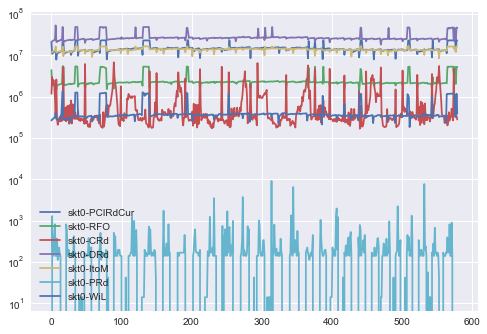

In [17]:
skt_1.plot(logy=True)

### Read the end-to-end KPIs, i.e., input rate, output rate, and latency
#### Read the input rate (in Gbps)

In [18]:
tx = pd.read_csv(path+"/tx_stats.csv")["MbitWithFraming"].reset_index(drop=True)
print("Data description:", tx.describe())

Data description: count     586.000000
mean     9908.272160
std       421.813717
min      2408.085484
25%      9940.602646
50%      9946.278051
75%      9949.506073
max      9969.970977
Name: MbitWithFraming, dtype: float64


#### Read the output rate, i.e., the throughput

In [19]:
rx = pd.read_csv(path+"/rx_stats.csv")["MbitWithFraming"].reset_index(drop=True)
print("Data description: ", rx.describe())

Data description:  count     585.000000
mean     6953.099936
std      1021.118852
min       418.060171
25%      6446.723991
50%      6824.167164
75%      7226.561360
max      9970.078119
Name: MbitWithFraming, dtype: float64


In [20]:
# Rename the column names to distinguish TX and RX statistics
tx.name = "Input_rate"
rx.name = "Output_rate"

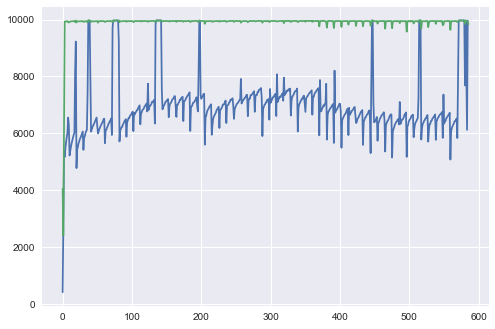

In [21]:
#plt.xlim(50,100)
plt.plot(rx)
plt.plot(tx)

In [22]:
causal_df = pd.concat([core_filtered, skt_1, mem_filtered, tx, rx], axis=1)[:len(rx)]

# Drop columns with constant values
causal_df = causal_df.loc[:, causal_df.nunique() > 1]

# Drop the energy metrics
causal_df.drop(columns=[col for col in causal_df.columns if "res" in col], inplace=True)
print(causal_df.columns)
causal_df.head()

Index(['EXEC', 'IPC', 'FREQ', 'AFREQ', 'L3MISS', 'L2MISS', 'L2HIT', 'L2MPI',
       'L3OCC', 'PhysIPC', 'PhysIPC%', 'INSTnom', 'INSTnom%', 'READ', 'WRITE',
       'skt0-PCIRdCur', 'skt0-RFO', 'skt0-CRd', 'skt0-DRd', 'skt0-ItoM',
       'skt0-PRd', 'skt0-WiL', 'Ch0Read', 'Ch0Write', 'Ch1Read', 'Ch1Write',
       'Mem Read (MB/s)', 'Mem Write (MB/s)', 'P. Write (T/s)',
       'Memory (MB/s)', 'Input_rate', 'Output_rate'],
      dtype='object')


,EXEC,IPC,FREQ,AFREQ,L3MISS,L2MISS,L2HIT,L2MPI,L3OCC,PhysIPC,...,Ch0Read,Ch0Write,Ch1Read,Ch1Write,Mem Read (MB/s),Mem Write (MB/s),P. Write (T/s),Memory (MB/s),Input_rate,Output_rate
0,3.92,3.30,1.18,1.19,0.00,9.60,0.12,0.0009,560.0,6.61,...,137.59,366.30,519.01,558.34,656.59,924.65,105882.0,1581.24,4050.318875,418.060171
1,4.17,3.52,1.19,1.19,0.01,7.05,0.10,0.0007,760.0,7.03,...,151.80,324.04,571.09,530.89,722.88,854.93,106012.0,1577.82,2408.085484,2620.339571
2,4.11,3.47,1.19,1.19,0.00,7.30,0.10,0.0007,720.0,6.93,...,150.39,329.84,565.87,535.29,716.27,865.13,105948.0,1581.40,6428.089805,5383.657557
3,4.14,3.49,1.19,1.19,0.01,7.50,0.10,0.0007,760.0,6.98,...,149.10,332.66,560.93,537.11,710.02,869.77,105837.0,1579.79,9925.846553,5172.023316
4,4.10,3.46,1.19,1.19,0.00,7.62,0.10,0.0007,640.0,6.92,...,148.67,334.43,557.83,538.42,706.50,872.85,105873.0,1579.35,9938.410428,5478.239348


In [23]:
causal_df.columns

Index(['EXEC', 'IPC', 'FREQ', 'AFREQ', 'L3MISS', 'L2MISS', 'L2HIT', 'L2MPI',
       'L3OCC', 'PhysIPC', 'PhysIPC%', 'INSTnom', 'INSTnom%', 'READ', 'WRITE',
       'skt0-PCIRdCur', 'skt0-RFO', 'skt0-CRd', 'skt0-DRd', 'skt0-ItoM',
       'skt0-PRd', 'skt0-WiL', 'Ch0Read', 'Ch0Write', 'Ch1Read', 'Ch1Write',
       'Mem Read (MB/s)', 'Mem Write (MB/s)', 'P. Write (T/s)',
       'Memory (MB/s)', 'Input_rate', 'Output_rate'],
      dtype='object')

#### Visualize the combined data together: 

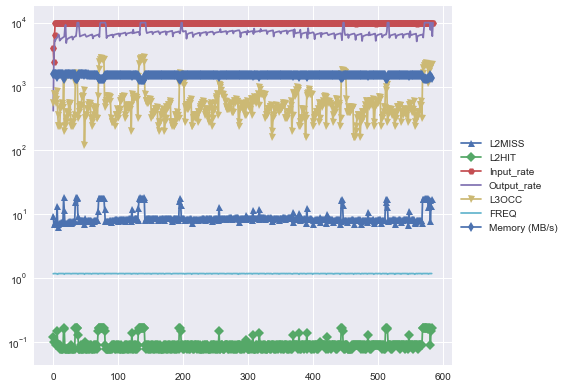

In [24]:
cols = ["L2MISS", "L2HIT", "Input_rate", "Output_rate", "L3OCC", "FREQ", 'Memory (MB/s)']
# Plot each column with a random marker
ax = None
for col in cols:
    ax = causal_df[col].plot(marker=np.random.choice(markers), ax=ax)
    
plt.yscale("log")
#plt.xlim(0,120)
#plt.ylim(0, 1e5)
# Adjust legend and layout

ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.show()

In [25]:
causal_df.corr()["Output_rate"]

EXEC               -0.488635
IPC                -0.489257
FREQ               -0.046474
AFREQ              -0.055425
L3MISS             -0.140118
L2MISS              0.482057
L2HIT               0.417576
L2MPI               0.479227
L3OCC               0.530588
PhysIPC            -0.489344
PhysIPC%           -0.489467
INSTnom            -0.488245
INSTnom%           -0.487820
READ               -0.474416
WRITE               0.331594
skt0-PCIRdCur       0.373898
skt0-RFO            0.331896
skt0-CRd           -0.043290
skt0-DRd            0.374751
skt0-ItoM           0.374505
skt0-PRd            0.000545
skt0-WiL            0.341328
Ch0Read            -0.467397
Ch0Write            0.384200
Ch1Read            -0.477809
Ch1Write            0.076304
Mem Read (MB/s)    -0.475753
Mem Write (MB/s)    0.319767
P. Write (T/s)     -0.512573
Memory (MB/s)      -0.524034
Input_rate          0.337040
Output_rate         1.000000
Name: Output_rate, dtype: float64

# Locate each plateau periods and remove the first one since it must be less than 10. 
causal_df = causal_df[3:].reset_index(drop=True)

# Compute average for each 10 consecutive indexes
causal_df['Group'] = causal_df.index // 10
grouped_avg = causal_df.groupby('Group').mean()
grouped_avg = normalize(grouped_avg)

# Compute the average for specific index ranges
averages = []

# Setting the initial start index
start_index = 3

while start_index < len(causal_df):
    end_index = start_index + 5  # Because you want to include 3-7, which is 5 values
    avg = causal_df.iloc[start_index:end_index].mean()
    averages.append(avg)
    
    # Increment the start index by 10 to move to the next range
    start_index += 10

result = pd.concat(averages, axis=1)
#result.T.head(100)
grouped_avg = result.T


In [26]:
grouped_avg = causal_df.iloc[(causal_df.index%10 >= 4) | (causal_df.index%10 <= 8)].reset_index(drop=True).dropna()
grouped_avg.head()

,EXEC,IPC,FREQ,AFREQ,L3MISS,L2MISS,L2HIT,L2MPI,L3OCC,PhysIPC,...,Ch0Read,Ch0Write,Ch1Read,Ch1Write,Mem Read (MB/s),Mem Write (MB/s),P. Write (T/s),Memory (MB/s),Input_rate,Output_rate
0,3.92,3.30,1.18,1.19,0.00,9.60,0.12,0.0009,560.0,6.61,...,137.59,366.30,519.01,558.34,656.59,924.65,105882.0,1581.24,4050.318875,418.060171
1,4.17,3.52,1.19,1.19,0.01,7.05,0.10,0.0007,760.0,7.03,...,151.80,324.04,571.09,530.89,722.88,854.93,106012.0,1577.82,2408.085484,2620.339571
2,4.11,3.47,1.19,1.19,0.00,7.30,0.10,0.0007,720.0,6.93,...,150.39,329.84,565.87,535.29,716.27,865.13,105948.0,1581.40,6428.089805,5383.657557
3,4.14,3.49,1.19,1.19,0.01,7.50,0.10,0.0007,760.0,6.98,...,149.10,332.66,560.93,537.11,710.02,869.77,105837.0,1579.79,9925.846553,5172.023316
4,4.10,3.46,1.19,1.19,0.00,7.62,0.10,0.0007,640.0,6.92,...,148.67,334.43,557.83,538.42,706.50,872.85,105873.0,1579.35,9938.410428,5478.239348


In [27]:
# Check NaN values from the dataset
nan_rows = grouped_avg[grouped_avg.isna().any(axis=1)]
print(nan_rows)

Empty DataFrame
Columns: [EXEC, IPC, FREQ, AFREQ, L3MISS, L2MISS, L2HIT, L2MPI, L3OCC, PhysIPC, PhysIPC%, INSTnom, INSTnom%, READ, WRITE, skt0-PCIRdCur, skt0-RFO, skt0-CRd, skt0-DRd, skt0-ItoM, skt0-PRd, skt0-WiL, Ch0Read, Ch0Write, Ch1Read, Ch1Write, Mem Read (MB/s), Mem Write (MB/s), P. Write (T/s), Memory (MB/s), Input_rate, Output_rate]
Index: []

[0 rows x 32 columns]


In [33]:
import os

def list_directories(path):
    """
    Returns a list of directories found at the specified path.
    """
    # List to hold the names of directories
    directories = []
    
    # Check if the path is a valid directory
    if os.path.isdir(path):
        # Iterate over the entries in the specified path
        for entry in os.listdir(path):
            # Construct full path
            full_path = os.path.join(path, entry)
            # If the entry is a directory, add it to the list
            if os.path.isdir(full_path):
                directories.append(entry)
    else:
        print(f"The path {path} is not a valid directory.")
        
    return directories

1024B-1024
1024B-4096
1024B-512
128B-1024
128B-256
128B-4096
128B-512
1510B-1024
1510B-256
1510B-4096
1510B-512
256B-1024
256B-256
256B-4096
256B-512
512B-1024
512B-256
512B-4096
512B-512
64B-1024
64B-256
64B-4096
64B-512


1024B-1024
1024B-4096
1024B-512
128B-1024
128B-256
128B-4096
128B-512
1510B-1024
1510B-256
1510B-4096
1510B-512
256B-1024
256B-256
256B-4096
256B-512
512B-1024
512B-256
512B-4096
512B-512
64B-1024
64B-256
64B-4096
64B-512


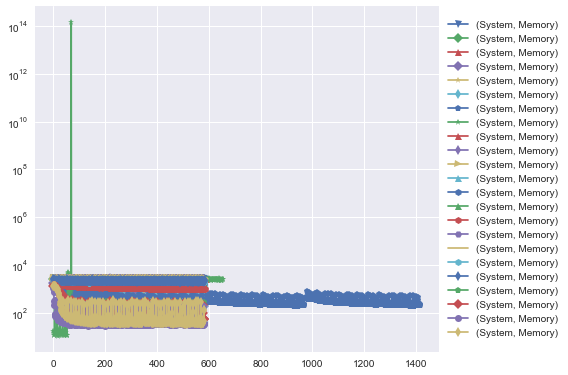

In [39]:
path = "../data/pcm/fixed_rate"
ax = None

dirs = list_directories(path)
for dir in dirs:
    print(dir)
    mem = pd.read_csv(path+"/"+ dir + "/pcm-memory.csv",  header=[0,1])
    

    ax = mem[(            'System',           'Memory')].plot(marker=np.random.choice(markers), ax=ax)
    
plt.yscale("log")

# Adjust legend and layout
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.show()
#plt.savefig("1.png")


In [28]:
mem = pd.read_csv(path+"/"+ "pcm-memory.csv",  header=[0,1])

print("Data dimension: ", mem.shape)
print("Data columns: ", mem.columns)

Data dimension:  (583, 29)
Data columns:  MultiIndex([('Unnamed: 0_level_0',             'Date'),
            ('Unnamed: 1_level_0',             'Time'),
            (              'SKT0',          'Ch0Read'),
            (              'SKT0',         'Ch0Write'),
            (              'SKT0',          'Ch1Read'),
            (              'SKT0',         'Ch1Write'),
            (              'SKT0',          'Ch2Read'),
            (              'SKT0',         'Ch2Write'),
            (              'SKT0',          'Ch3Read'),
            (              'SKT0',         'Ch3Write'),
            (              'SKT0',  'Mem Read (MB/s)'),
            (              'SKT0', 'Mem Write (MB/s)'),
            (              'SKT0',   'P. Write (T/s)'),
            (              'SKT0',    'Memory (MB/s)'),
            (              'SKT1',          'Ch0Read'),
            (              'SKT1',         'Ch0Write'),
            (              'SKT1',          'Ch1Read'),
      